 #  <p style="text-align: center;">Technical Support Data Analysis

Technical support data can often be a rich source of information on opportunities for improving customer experience. 

The lesser the trouble customers have with the product the better. 

Even better when the customers are able to overcome technical challenge quickly with minimal effort. 

Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

## Loading the Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics

tech_supp_df = pd.read_csv(r"datasets/technical_support_data.csv")
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [2]:
tech_supp_df.shape

(23, 8)

In [3]:
tech_supp_df.head()


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


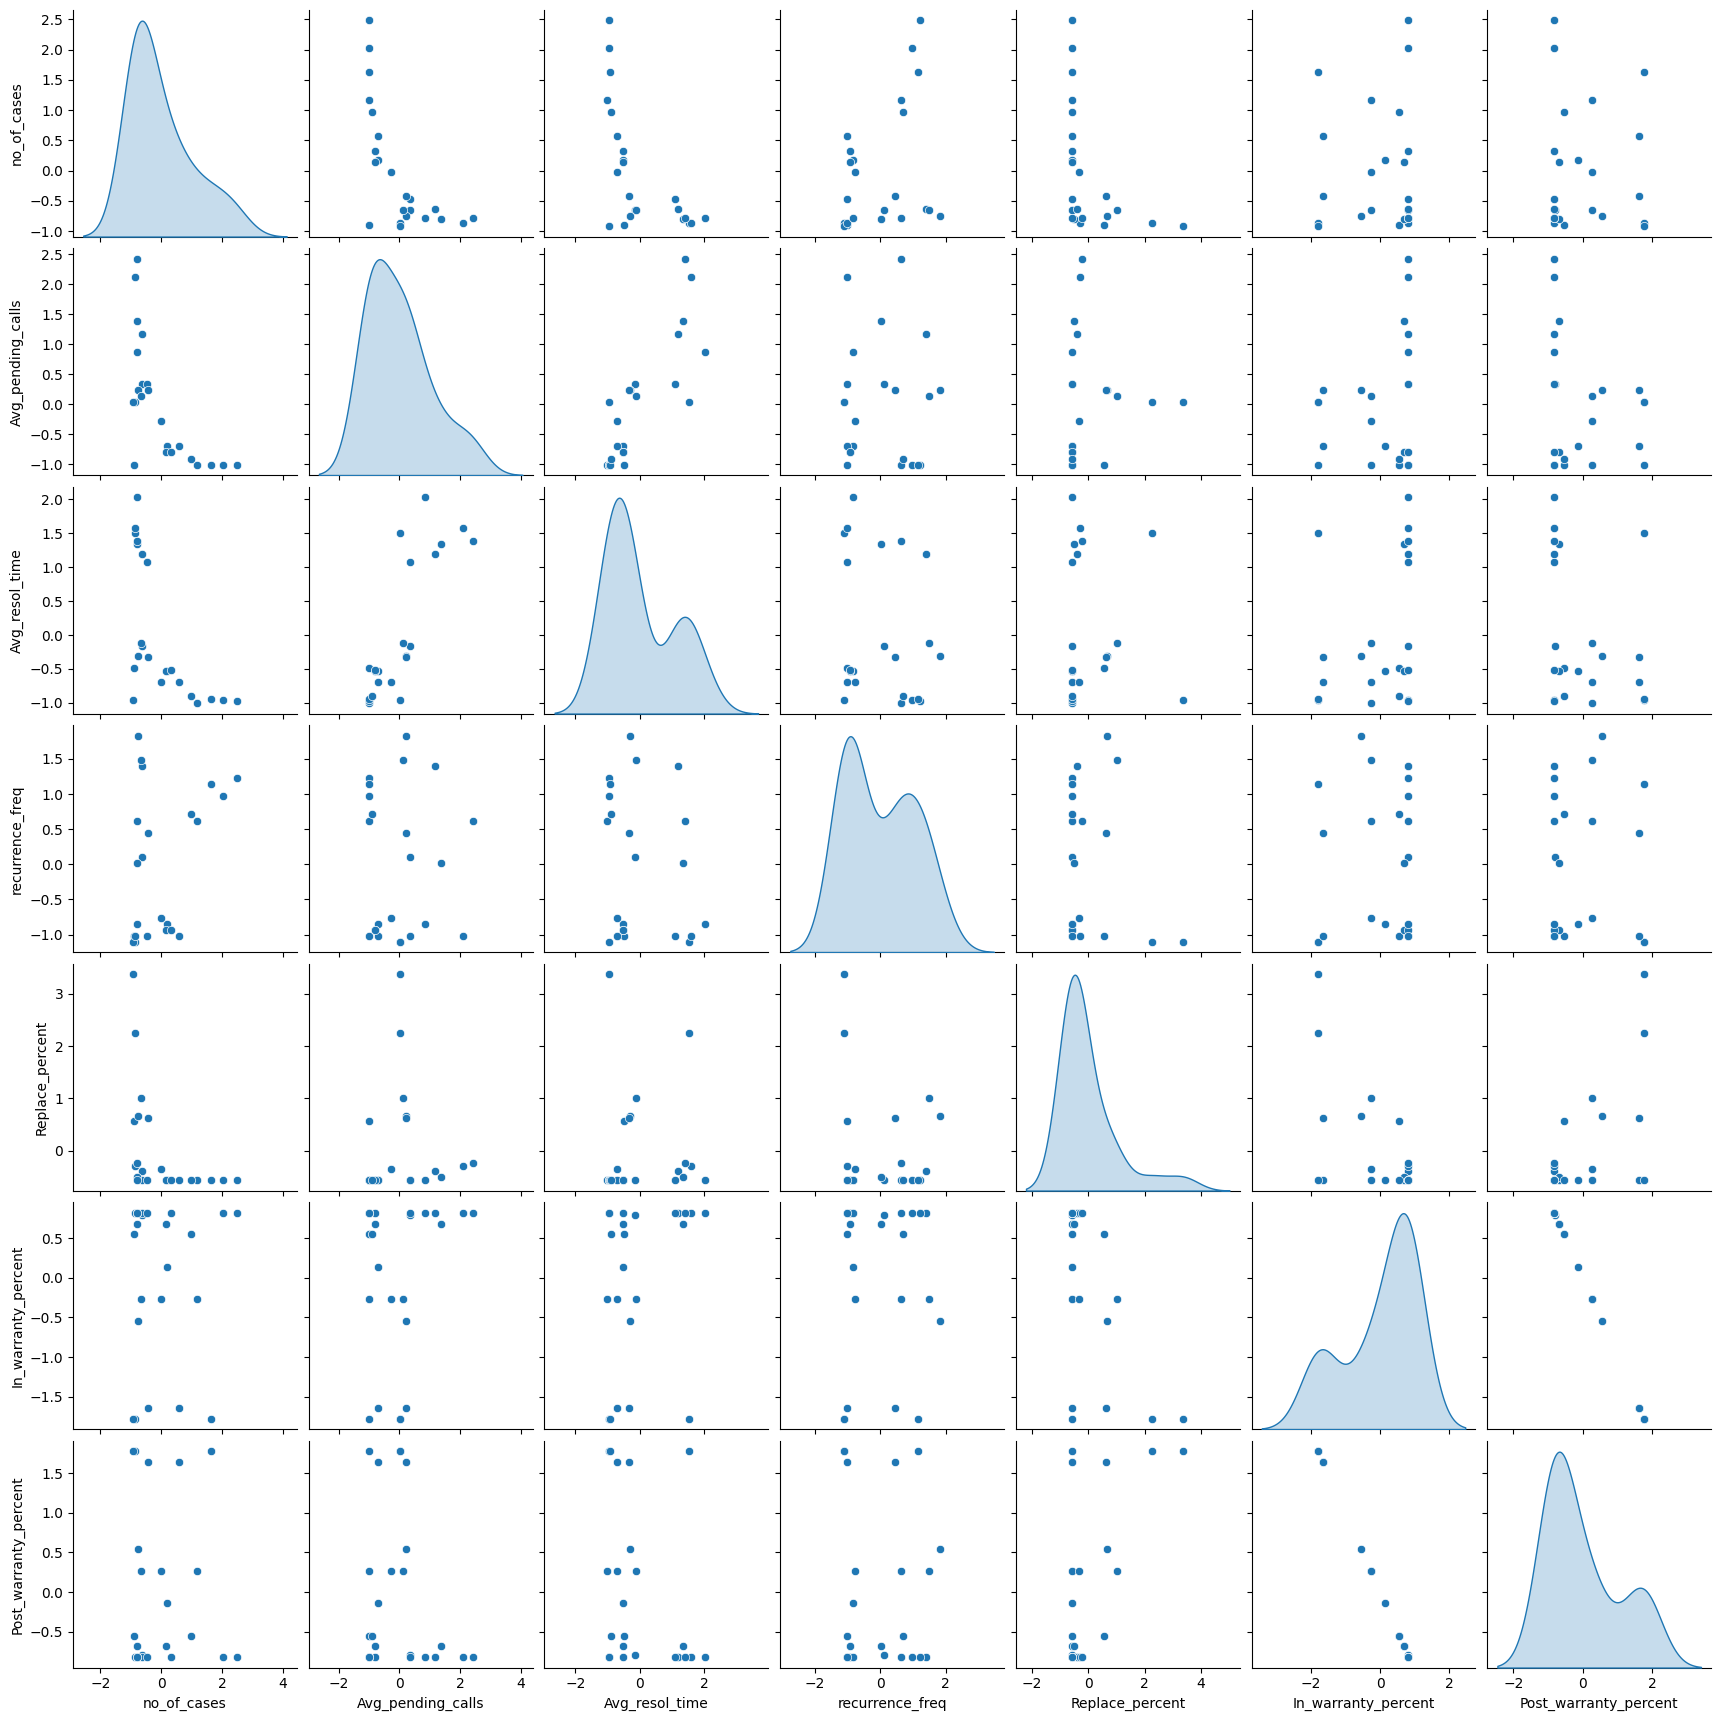

In [4]:
techSuppAttr=tech_supp_df.iloc[:,1:]
techSuppScaled=techSuppAttr.apply(zscore)
sns.pairplot(techSuppScaled,diag_kind='kde')

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

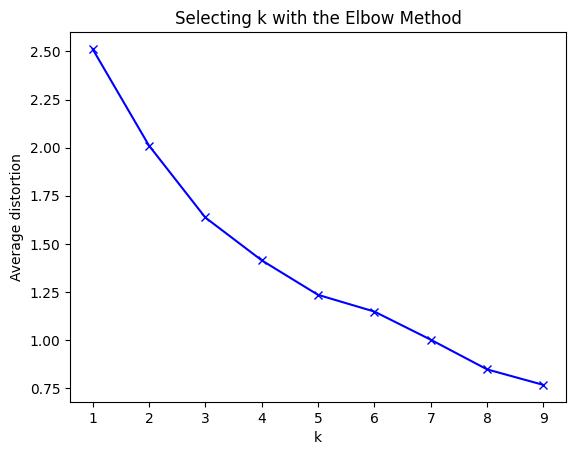

In [5]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k, n_init="auto")
    model.fit(techSuppScaled)
    prediction=model.predict(techSuppScaled)
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, model.cluster_centers_, 'euclidean'), axis=1)) / techSuppScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

In [6]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



/home/atul/Public/Data_science/Git_repo_1/venv_git_repo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


### Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.


In [7]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

/tmp/ipykernel_130359/2104334011.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  techSuppClust.mean()


,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,250.444444,1.166667,20.666667,0.125556,0.026667,85.555556,14.444444
1,35.000000,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
2,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714


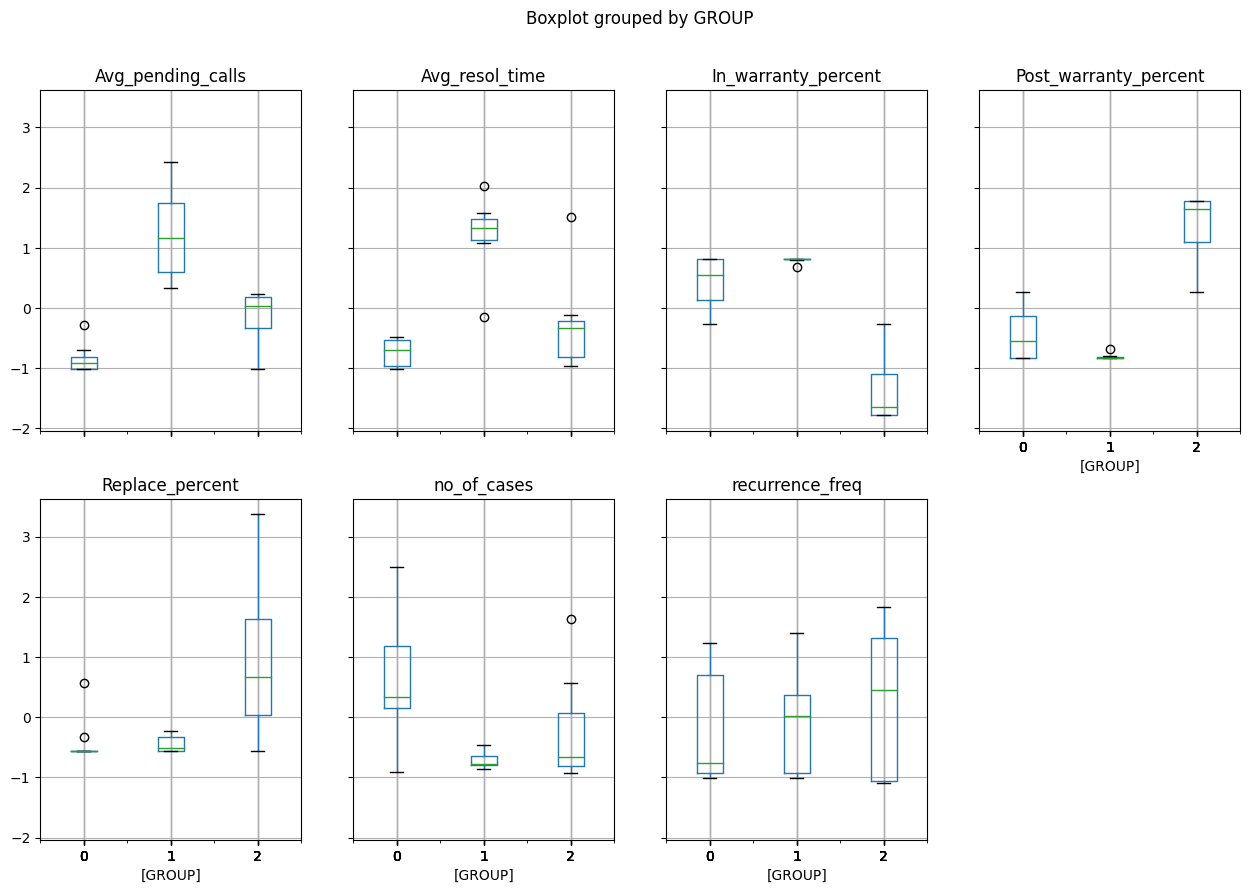

In [8]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))
plt.show()

Let us next try with K = 5, the next elbow point

In [9]:
# Let us first start with K = 5
final_model=KMeans(5, n_init='auto')
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,3
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,1
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,3
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,1
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [10]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean(numeric_only=True)

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,38.333333,3.233333,109.666667,0.220000,0.030000,99.666667,0.333333
1,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714
2,395.250000,1.025000,7.750000,0.240000,0.000000,87.500000,12.500000
3,134.600000,1.280000,31.000000,0.034000,0.048000,84.000000,16.000000
4,32.500000,3.100000,149.750000,0.055000,0.015000,98.750000,1.250000


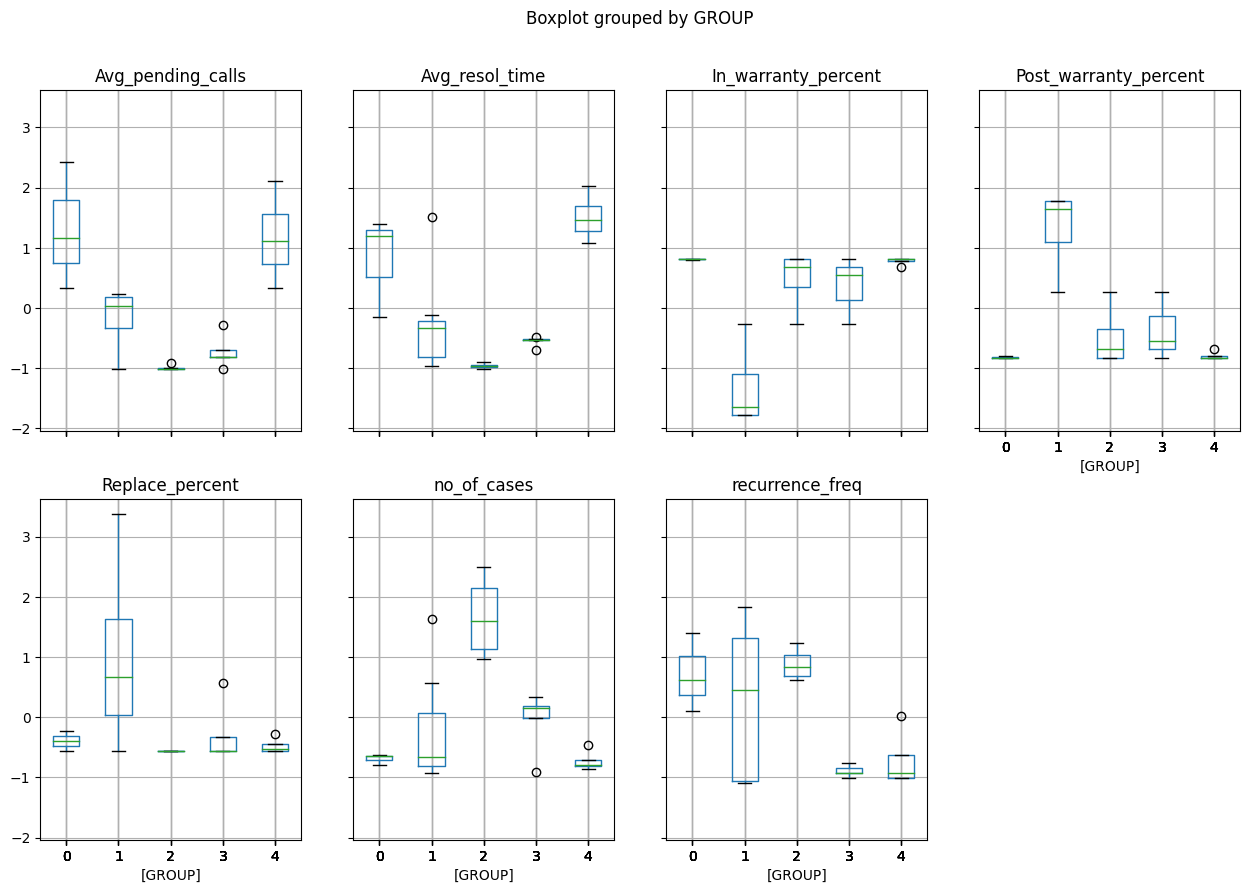

In [11]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))
plt.show()